In [ ]:
import pandas as pd
from google.colab import drive
from google.colab.patches import cv2_imshow

import cv2
import os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
from PIL import ImageFile 
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
food_list=os.listdir('/content/drive/MyDrive/final_project/food_img')
food_list.remove('test')
food_list.remove('04016001 validation ')

In [ ]:
def imageprocessing(food_list):
  train = []
  test = []
  for idx, j in enumerate(food_list):
    # label = food_list[idx]    
    label = [0 for i in range(len(food_list))]
    label[idx] =  1
    pro_food = os.listdir('/content/drive/MyDrive/final_project/food_img/'+j)
    for k in pro_food:
      img =load_img('/content/drive/MyDrive/final_project/food_img/'+j+'/'+k, target_size=(128,128))
      img = img.convert("RGB")
      imgArray = np.uint8(image.img_to_array(img)) / 255.0
      train.append(imgArray)
      test.append(label)
  img_Array = np.array(train)
  # img_label = test
  img_label = np.array(test)
  with open('food.pickle', 'wb') as f:
    pickle.dump(img_Array, f, pickle.HIGHEST_PROTOCOL)
  with open('food_label.pickle', 'wb') as f:
    pickle.dump(img_label, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
imageprocessing(food_list)

In [ ]:
with open('food.pickle', 'rb') as f:
    data = pickle.load(f)

print(data)

[[[[0.73333333 0.56078431 0.41568627]
   [0.74117647 0.56862745 0.42352941]
   [0.75686275 0.58431373 0.43137255]
   ...
   [0.68627451 0.52156863 0.36470588]
   [0.69411765 0.52941176 0.37254902]
   [0.68627451 0.51372549 0.36862745]]

  [[0.7254902  0.55294118 0.40784314]
   [0.70980392 0.5372549  0.39215686]
   [0.73333333 0.56078431 0.40784314]
   ...
   [0.69019608 0.5254902  0.36862745]
   [0.69019608 0.5254902  0.36862745]
   [0.68235294 0.50980392 0.36470588]]

  [[0.71764706 0.54509804 0.40784314]
   [0.71764706 0.54509804 0.40784314]
   [0.7254902  0.55294118 0.41568627]
   ...
   [0.69411765 0.52941176 0.38039216]
   [0.69019608 0.5254902  0.36862745]
   [0.67058824 0.49803922 0.35294118]]

  ...

  [[0.68235294 0.52156863 0.40392157]
   [0.67843137 0.51764706 0.4       ]
   [0.62745098 0.46666667 0.34901961]
   ...
   [0.43137255 0.30196078 0.18039216]
   [0.39607843 0.26666667 0.14509804]
   [0.4        0.27058824 0.14901961]]

  [[0.68627451 0.5254902  0.40784314]
   [0.6

In [ ]:
with open('food_label.pickle', 'rb') as f:
    data1 = pickle.load(f)

print(data1)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data, data1)

In [ ]:
model=Sequential()
model.add(Conv2D(128 ,kernel_size=(3,3), input_shape=xtrain.shape[1:],activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(data1[1]), activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs=40, batch_size=50, validation_data=(xtest,ytest))
# model.fit(x1,y1, batch_size=200, epochs=10, validation_split=0.2)

Epoch 1/40
23/23 [==============================] - 137s 6s/step - loss: 0.8487 - accuracy: 0.2284 - val_loss: 0.5208 - val_accuracy: 0.3947
Epoch 2/40
23/23 [==============================] - 133s 6s/step - loss: 0.4969 - accuracy: 0.2996 - val_loss: 0.4666 - val_accuracy: 0.3893
Epoch 3/40
23/23 [==============================] - 133s 6s/step - loss: 0.4362 - accuracy: 0.4284 - val_loss: 0.3939 - val_accuracy: 0.4800
Epoch 4/40
23/23 [==============================] - 133s 6s/step - loss: 0.3917 - accuracy: 0.5084 - val_loss: 0.3682 - val_accuracy: 0.5227
Epoch 5/40
23/23 [==============================] - 134s 6s/step - loss: 0.3693 - accuracy: 0.5253 - val_loss: 0.3621 - val_accuracy: 0.5093
Epoch 6/40
23/23 [==============================] - 133s 6s/step - loss: 0.3516 - accuracy: 0.5529 - val_loss: 0.3416 - val_accuracy: 0.5600
Epoch 7/40
23/23 [==============================] - 133s 6s/step - loss: 0.3394 - accuracy: 0.5716 - val_loss: 0.3379 - val_accuracy: 0.5653
Epoch 8/40
23

In [ ]:
score = model.evaluate(xtest, ytest)
print(score)

12/12 [==============================] - 10s 835ms/step - loss: 0.3964 - accuracy: 0.7227
[0.3964095413684845, 0.7226666808128357]


In [ ]:
filename = 'bagstew1.jpg'
filename

'bagstew1.jpg'

In [ ]:
import matplotlib.pyplot as plt

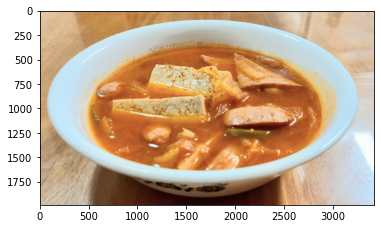

In [ ]:
from keras.preprocessing import image
org = image.load_img(filename)
plt.imshow(np.uint8(org)) #정수

(128, 128, 3)

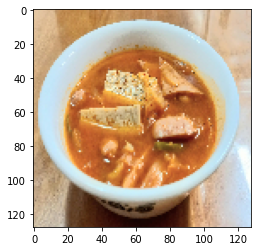

In [ ]:
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

In [ ]:
my = np.expand_dims(img, axis=0)
my.shape

(1, 128, 128, 3)

In [ ]:
my1 = my/255.0
output = model.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])

bagstew1.jpg => 04016001


<BarContainer object of 5 artists>

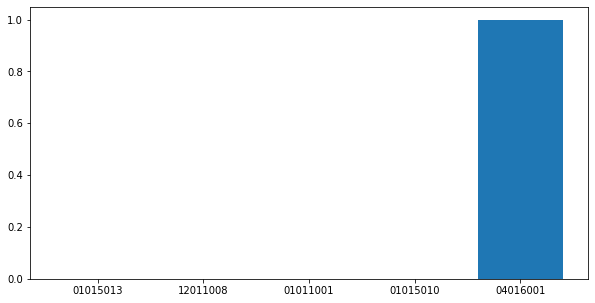

In [ ]:
# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

In [ ]:
filename = 'bagstew2.jpeg'
filename

'bagstew2.jpeg'

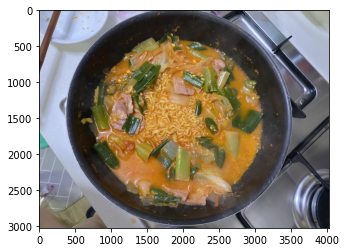

In [ ]:
org = image.load_img(filename)
plt.imshow(np.uint8(org)) #정수

(128, 128, 3)

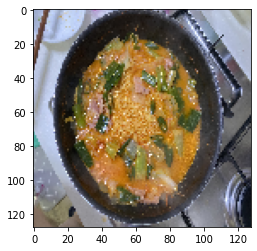

In [ ]:
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

In [ ]:
my = np.expand_dims(img, axis=0)
my.shape

(1, 128, 128, 3)

In [ ]:
my1 = my/255.0
output = model.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])

bagstew2.jpeg => 04016001


<BarContainer object of 5 artists>

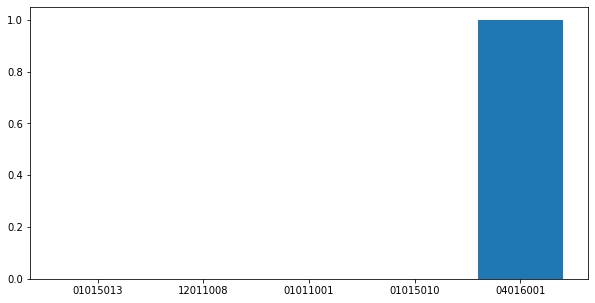

In [ ]:
# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

In [ ]:
filename = 'kim1.jpeg'
filename

'kim1.jpeg'

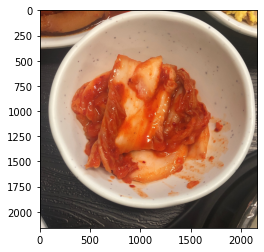

In [ ]:
org = image.load_img(filename)
plt.imshow(np.uint8(org)) #정수

(128, 128, 3)

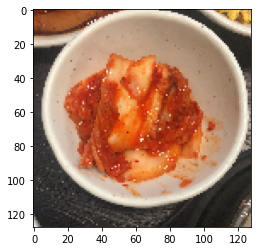

In [ ]:
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

In [ ]:
my = np.expand_dims(img, axis=0)
my.shape

(1, 128, 128, 3)

In [ ]:
my1 = my/255.0
output = model.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])

kim1.jpeg => 12011008


<BarContainer object of 5 artists>

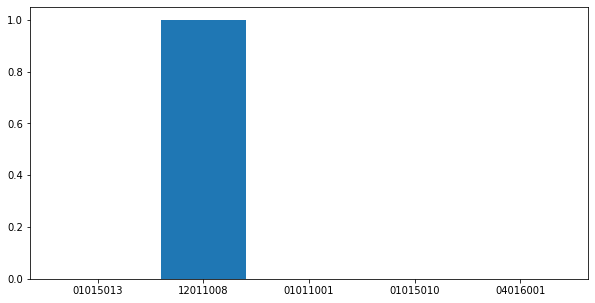

In [ ]:
# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

In [ ]:
filename = 'kim2.jpg'
filename

'kim2.jpg'

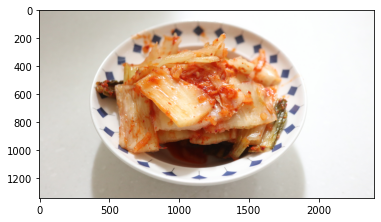

In [ ]:
org = image.load_img(filename)
plt.imshow(np.uint8(org)) #정수

(128, 128, 3)

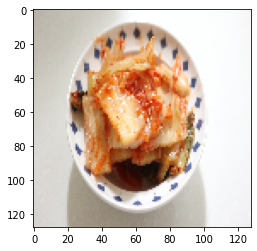

In [ ]:
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

In [ ]:
my = np.expand_dims(img, axis=0)
my.shape

(1, 128, 128, 3)

In [ ]:
my1 = my/255.0
output = model.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])

kim2.jpg => 04016001


<BarContainer object of 5 artists>

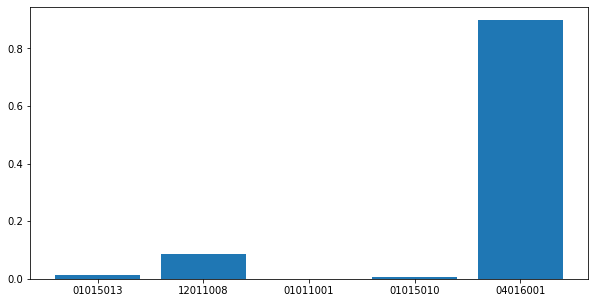

In [ ]:
# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

In [ ]:
filename = '제육1.jpg'
filename

'제육1.jpg'

제육1.jpg => 12011008


<BarContainer object of 5 artists>

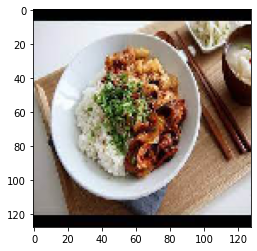

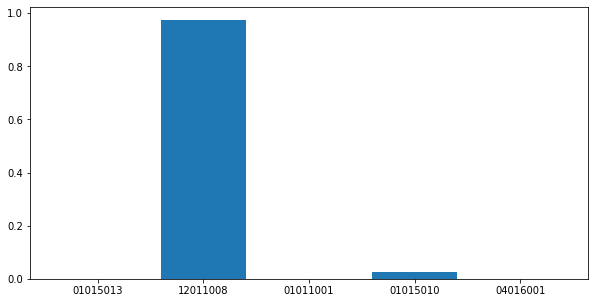

In [ ]:
filename = '제육1.jpg'
filename
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

my = np.expand_dims(img, axis=0)
my.shape

my1 = my/255.0
output = model.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])


# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

In [ ]:
model=Sequential()
model.add(Conv2D(128 ,kernel_size=(3,3), input_shape=xtrain.shape[1:],activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128 ,kernel_size=(3,3), input_shape=xtrain.shape[1:],activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(data1[1]), activation='softmax'))

In [ ]:
# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

In [ ]:
model.compile(optimizer="Adam", loss="mse", metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs=30, batch_size=100, validation_data=(xtest,ytest))

Epoch 1/30
12/12 [==============================] - 171s 14s/step - loss: 0.1763 - accuracy: 0.1973 - val_loss: 0.1588 - val_accuracy: 0.2587
Epoch 2/30
12/12 [==============================] - 170s 14s/step - loss: 0.1501 - accuracy: 0.3333 - val_loss: 0.1369 - val_accuracy: 0.4853
Epoch 3/30
12/12 [==============================] - 170s 14s/step - loss: 0.1308 - accuracy: 0.4302 - val_loss: 0.1206 - val_accuracy: 0.5307
Epoch 4/30
12/12 [==============================] - 170s 14s/step - loss: 0.1200 - accuracy: 0.5120 - val_loss: 0.1114 - val_accuracy: 0.5333
Epoch 5/30
12/12 [==============================] - 169s 14s/step - loss: 0.1145 - accuracy: 0.5209 - val_loss: 0.1095 - val_accuracy: 0.5520
Epoch 6/30
12/12 [==============================] - 170s 14s/step - loss: 0.1108 - accuracy: 0.5582 - val_loss: 0.1064 - val_accuracy: 0.5493
Epoch 7/30
12/12 [==============================] - 174s 15s/step - loss: 0.1056 - accuracy: 0.5680 - val_loss: 0.1028 - val_accuracy: 0.5813
Epoch 

In [ ]:
score = model.evaluate(xtest, ytest)
print(score)

12/12 [==============================] - 12s 1s/step - loss: 0.0704 - accuracy: 0.7573
[0.07043818384408951, 0.7573333382606506]


12/12 - 12s - loss: 0.2218 - accuracy: 0.7733 - 12s/epoch - 1s/step

Test accuracy: 0.7733333110809326


In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs=30, batch_size=100, validation_data=(xtest,ytest))

Epoch 1/30
12/12 [==============================] - 158s 13s/step - loss: 0.7538 - accuracy: 0.2053 - val_loss: 0.5789 - val_accuracy: 0.2320
Epoch 2/30
12/12 [==============================] - 154s 13s/step - loss: 0.5090 - accuracy: 0.2409 - val_loss: 0.5360 - val_accuracy: 0.3333
Epoch 3/30
12/12 [==============================] - 154s 13s/step - loss: 0.4819 - accuracy: 0.3609 - val_loss: 0.4563 - val_accuracy: 0.5467
Epoch 4/30
12/12 [==============================] - 156s 13s/step - loss: 0.4129 - accuracy: 0.4782 - val_loss: 0.3710 - val_accuracy: 0.5440
Epoch 5/30
12/12 [==============================] - 154s 13s/step - loss: 0.3783 - accuracy: 0.5111 - val_loss: 0.3654 - val_accuracy: 0.5573
Epoch 6/30
12/12 [==============================] - 154s 13s/step - loss: 0.3534 - accuracy: 0.5431 - val_loss: 0.3401 - val_accuracy: 0.5600
Epoch 7/30
12/12 [==============================] - 154s 13s/step - loss: 0.3334 - accuracy: 0.5876 - val_loss: 0.3367 - val_accuracy: 0.5840
Epoch 

In [ ]:
score = model.evaluate(xtest, ytest)
print(score)

12/12 [==============================] - 16s 1s/step - loss: 0.2218 - accuracy: 0.7733
[0.2218444049358368, 0.7733333110809326]


In [ ]:
test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

print('\nTest accuracy:', test_acc)

12/12 - 12s - loss: 0.2218 - accuracy: 0.7733 - 12s/epoch - 1s/step

Test accuracy: 0.7733333110809326


In [ ]:
#공부방법

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'] 
)

In [ ]:
model.fit(xtrain, ytrain, epochs=30, batch_size=100, validation_data=(xtest,ytest))

Epoch 1/30
12/12 [==============================] - 172s 14s/step - loss: 0.2114 - accuracy: 0.9440 - val_loss: 1.2303 - val_accuracy: 0.7413
Epoch 2/30
12/12 [==============================] - 172s 14s/step - loss: 0.1194 - accuracy: 0.9582 - val_loss: 1.0268 - val_accuracy: 0.7840
Epoch 3/30
12/12 [==============================] - 172s 14s/step - loss: 0.0907 - accuracy: 0.9698 - val_loss: 1.1233 - val_accuracy: 0.7840
Epoch 4/30
12/12 [==============================] - 166s 14s/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 1.1767 - val_accuracy: 0.7733
Epoch 5/30
12/12 [==============================] - 164s 14s/step - loss: 0.0402 - accuracy: 0.9858 - val_loss: 1.2146 - val_accuracy: 0.7973
Epoch 6/30
12/12 [==============================] - 162s 14s/step - loss: 0.0443 - accuracy: 0.9840 - val_loss: 1.2571 - val_accuracy: 0.7813
Epoch 7/30
12/12 [==============================] - 162s 14s/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 1.1675 - val_accuracy: 0.7920
Epoch 

In [ ]:
score = model.evaluate(xtest, ytest)
print(score)

12/12 [==============================] - 12s 1s/step - loss: 1.2202 - accuracy: 0.7893
[1.2202178239822388, 0.7893333435058594]


In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=xtrain.shape[1:], padding="same", activation="relu")) 
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=xtrain.shape[1:], padding="same", activation="relu")) 
model1.add(MaxPooling2D(pool_size=(2, 2))) 
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=xtrain.shape[1:], padding="same", activation="relu")) 
model1.add(MaxPooling2D(pool_size=(2, 2))) 
model1.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=xtrain.shape[1:], padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2))) 
model1.add(Flatten()) 
model1.add(Dense(units=512, activation="relu")) 
model1.add(Dropout(0.5)) 
model1.add(Dense(len(data1[1]), activation="softmax")) 
model1.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
h1 = model1.fit(xtrain, ytrain, epochs=20, batch_size=20, validation_data=(xtest,ytest))

Epoch 1/20
57/57 [==============================] - 49s 857ms/step - loss: 1.4416 - acc: 0.3627 - val_loss: 1.1620 - val_acc: 0.5013
Epoch 2/20
57/57 [==============================] - 49s 854ms/step - loss: 1.1238 - acc: 0.5102 - val_loss: 1.0877 - val_acc: 0.5200
Epoch 3/20
57/57 [==============================] - 48s 851ms/step - loss: 0.9897 - acc: 0.6116 - val_loss: 0.8692 - val_acc: 0.6347
Epoch 4/20
57/57 [==============================] - 48s 848ms/step - loss: 0.8766 - acc: 0.6782 - val_loss: 0.8506 - val_acc: 0.6640
Epoch 5/20
57/57 [==============================] - 49s 853ms/step - loss: 0.7479 - acc: 0.7156 - val_loss: 0.6909 - val_acc: 0.7360
Epoch 6/20
57/57 [==============================] - 48s 838ms/step - loss: 0.6386 - acc: 0.7627 - val_loss: 0.7074 - val_acc: 0.7093
Epoch 7/20
57/57 [==============================] - 47s 832ms/step - loss: 0.6389 - acc: 0.7636 - val_loss: 0.5879 - val_acc: 0.7813
Epoch 8/20
57/57 [==============================] - 47s 833ms/step - 

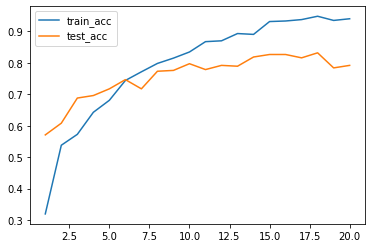

In [ ]:
import matplotlib.pyplot as plt
acc = h1.history["acc"] 
val_acc = h1.history["val_acc"] 
plt.plot(range(1, len(acc)+1), acc, label="train_acc") 
plt.plot(range(1, len(acc)+1), val_acc, label="test_acc") 
plt.legend()


In [ ]:
from tensorflow.keras.applications import Xception 
base_conv = Xception(weights="imagenet", include_top=False, input_shape=xtrain.shape[1:]) 
# 동결 
base_conv.trainable = False 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten 
model3 = Sequential() 
model3.add(base_conv)
model3.add(Flatten()) 
model3.add(Dense(512, activation="relu")) 
model3.add(Dense(len(data1[0]), activation="softmax")) 
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               16777728  
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 37,641,773
Trainable params: 16,780,293
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
h1 = model3.fit(xtrain, ytrain, epochs=20, batch_size=20, validation_data=(xtest,ytest))

Epoch 1/20
57/57 [==============================] - 82s 1s/step - loss: 5.1431 - acc: 0.6311 - val_loss: 2.2800 - val_acc: 0.6640
Epoch 2/20
57/57 [==============================] - 80s 1s/step - loss: 0.7266 - acc: 0.8240 - val_loss: 0.8506 - val_acc: 0.7840
Epoch 3/20
57/57 [==============================] - 79s 1s/step - loss: 0.3077 - acc: 0.8987 - val_loss: 0.9044 - val_acc: 0.7973
Epoch 4/20
57/57 [==============================] - 80s 1s/step - loss: 0.2775 - acc: 0.9156 - val_loss: 1.3704 - val_acc: 0.7413
Epoch 5/20
57/57 [==============================] - 79s 1s/step - loss: 0.2537 - acc: 0.9227 - val_loss: 1.2300 - val_acc: 0.7360
Epoch 6/20
57/57 [==============================] - 78s 1s/step - loss: 0.1010 - acc: 0.9618 - val_loss: 0.8927 - val_acc: 0.8000
Epoch 7/20
57/57 [==============================] - 79s 1s/step - loss: 0.0189 - acc: 0.9956 - val_loss: 0.8204 - val_acc: 0.8080
Epoch 8/20
57/57 [==============================] - 79s 1s/step - loss: 0.0055 - acc: 1.00

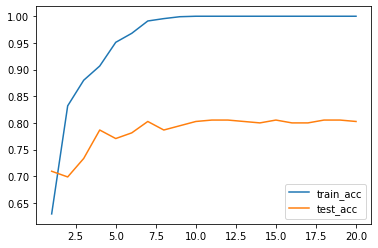

In [ ]:
acc = h1.history["acc"] 
val_acc = h1.history["val_acc"] 
plt.plot(range(1, len(acc)+1), acc, label="train_acc") 
plt.plot(range(1, len(acc)+1), val_acc, label="test_acc") 
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
acc1 = h1.history["acc"] 
val_acc1 = h1.history["val_acc"] 
plt.plot(range(1, len(acc)+1), acc1, label="train_acc") 
plt.plot(range(1, len(acc)+1), val_acc1, label="test_acc") 
plt.legend()


NameError: ignored

In [ ]:
score3 = model3.evaluate(xtest, ytest)
print(score3)

In [ ]:
test_loss, test_acc = model3.evaluate(xtest,  ytest, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
filename = 'kim2.jpg'
filename

In [ ]:
org = image.load_img(filename)
plt.imshow(np.uint8(org)) #정수

In [ ]:
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

In [ ]:
my = np.expand_dims(img, axis=0)
my.shape

In [ ]:
my1 = my/255.0
output = model3.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])

<BarContainer object of 5 artists>

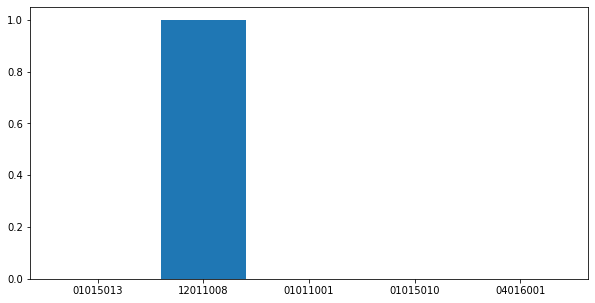

In [ ]:
# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

제육1.jpg => 12011008


<BarContainer object of 5 artists>

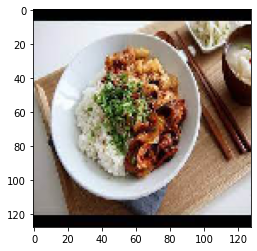

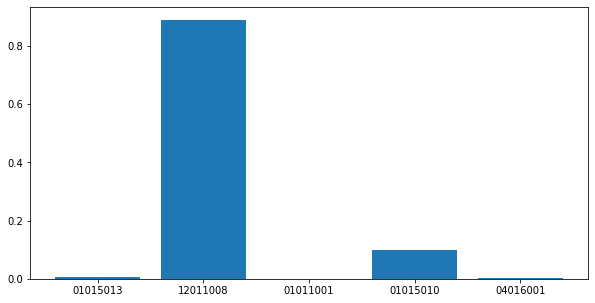

In [ ]:
filename = '제육1.jpg'
filename
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

my = np.expand_dims(img, axis=0)
my.shape

my1 = my/255.0
output = model.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])


# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')

kim2.jpg => 12011008


<BarContainer object of 5 artists>

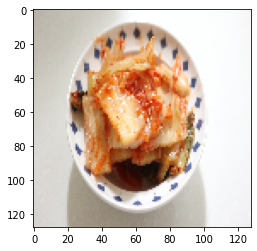

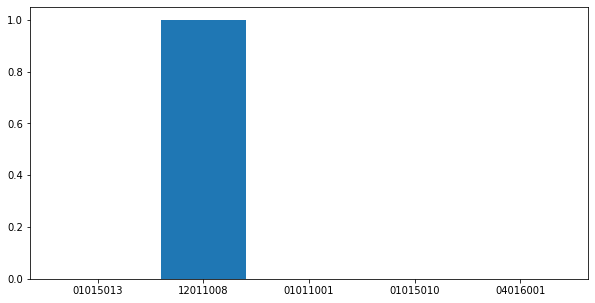

In [ ]:
filename = 'kim2.jpg'
filename
testimg = image.load_img(filename, target_size=(128,128))
img = image.img_to_array(testimg)
plt.imshow(np.uint8(img))
img.shape

my = np.expand_dims(img, axis=0)
my.shape

my1 = my/255.0
output = model3.predict(my1)
print(filename, "=>", food_list[np.argmax(output)])


# 확률 구하기
x_index = np.arange(len(food_list))
output = output.reshape(5)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=food_list, align='center')